In [1]:
#importing libraries

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from osgeo import gdal, osr, ogr
np.random.seed(0) #setting random seed
import matplotlib.pyplot as plt
import pickle 

In [4]:
#loading another file to check whether its working or not

puneAnt= gdal.Open('/content/drive/MyDrive/image_2017.tif',0)
bandsAnt=[]
for band in range(1,7):
  band_dataAnt=puneAnt.GetRasterBand(band).ReadAsArray()
  bandsAnt.append(band_dataAnt)

landsatDataAnt=np.stack(bandsAnt,axis=-1)

puneAnt=None #removing ds variable and releasing memory

landsatData0Ant=np.nan_to_num(landsatDataAnt,nan=0) #assigning 0 for nan values
landsatDataAnt=None

lsFlattenAnt= landsatData0Ant.reshape(-1,6)
flatDfAnt=pd.DataFrame(data=lsFlattenAnt,columns=['blue','green','red','nir','swir1','swir2'])

In [5]:
filename = '/content/drive/MyDrive/BigGeoProj/rf2.sav'  # Replace with the path and filename of the saved model
clf = pickle.load(open(filename, 'rb'))

In [6]:
predFinalAnt=clf.predict(flatDfAnt)  #predicitng on our input satellite image data (here pune data)
predFinalAnt

array([4, 4, 4, ..., 4, 4, 4])

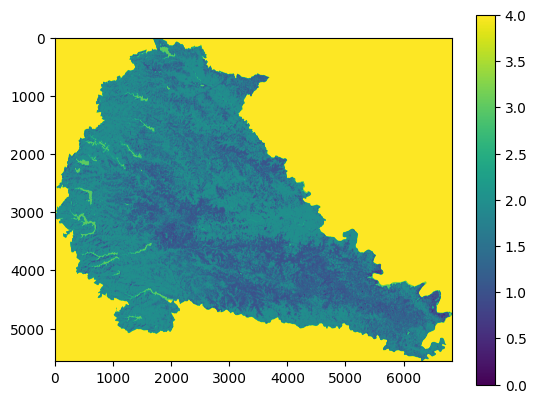

In [7]:
predFinalAnt=predFinalAnt.reshape(5568,6828)
plt.imshow(predFinalAnt)
plt.colorbar()

In [ ]:
output_file = "/content/drive/MyDrive/pune17_rf_2"
driver = gdal.GetDriverByName("GTiff")

# get the spatial reference system of the data (optional)
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)  # set to WGS84

# create a new GeoTIFF file with one band
dst_ds = driver.Create(output_file, predFinalAnt.shape[1], predFinalAnt.shape[0], 1, gdal.GDT_Float32)

# set the projection (optional)
dst_ds.SetProjection(srs.ExportToWkt())

# write the data to the GeoTIFF file
dst_ds.GetRasterBand(1).WriteArray(predFinalAnt)

# close the file
dst_ds = None

In [8]:
clf=None
predFinalAnt=None